###Analizando los Salarios en Ciencia de Datos en 2023



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Limpieza de datos
# Cargar el dataset
df = pd.read_csv('/content/ds_salaries.csv')

### Detección y eliminación de valores duplicados
Verificaremos si existen filas duplicadas en el dataset y eliminaremos las que se encuentren repetidas.

In [4]:
duplicates = df.duplicated().sum() # Contar duplicados
df = df.drop_duplicates()  # Eliminar duplicados
print(f'Registros duplicados eliminados: {duplicates}')

Registros duplicados eliminados: 1171


### Verificación y ajuste de tipos de datos
Nos aseguraremos de que los tipos de datos de las columnas sean los correctos de acuerdo con el diccionario de datos.

In [6]:
    # Verificación y ajuste de tipos de datos

df['work_year'] = df['work_year'].astype(int)
df['salary'] = df['salary'].astype(float)
df['salary_in_usd'] = df['salary_in_usd'].astype(float)
df['remote_ratio'] = df['remote_ratio'].astype(int)

### Consistencia en valores categóricos
Corregiremos inconsistencias en los valores categóricos ( diferencias entre mayúsculas y minúsculas).

In [8]:
    # Consistencia en valores categóricos
 #  a minúsculas para asegurar consistencia
df['experience_level'] = df['experience_level'].str.lower()
df['employment_type'] = df['employment_type'].str.lower()
df['company_size'] = df['company_size'].str.lower()

### Manejo de valores faltantes
Identificaremos las columnas que tienen valores nulos y aplicaremos estrategias para manejarlos (rellenando o imputando según el tipo de dato).

In [9]:
   # Manejo de valores faltantes
missing_values = df.isnull().sum()
df.fillna({'salary_currency': 'Unknown', 'company_location': 'Unknown'}, inplace=True)
print(f'Valores faltantes por columna antes del llenado:\n{missing_values}')

Valores faltantes por columna antes del llenado:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Detección de datos anómalos
Identificaremos valores anómalos en las variables numéricas y los corregiremos.

In [10]:
 # Detección de datos (outlierss)
 #  Z-score para identificar outliers en 'salary_in_usd'
z_scores = np.abs(stats.zscore(df['salary_in_usd']))
df = df[z_scores < 3]# Eliminamos filas con Z-score mayor a 3 (posibles outliers)
print(f'Registros después de eliminar outliers: {len(df)}')

Registros después de eliminar outliers: 2563


In [11]:
  # Imprimimos el estado después de la limpieza
print("Limpieza de datos completada.")
print(f"Registros duplicados eliminados: {duplicates}")
print(f"Valores faltantes por columna antes del llenado:\n{missing_values}")
print(f"Registros después de eliminar outliers: {len(df)}")

Limpieza de datos completada.
Registros duplicados eliminados: 1171
Valores faltantes por columna antes del llenado:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Registros después de eliminar outliers: 2563


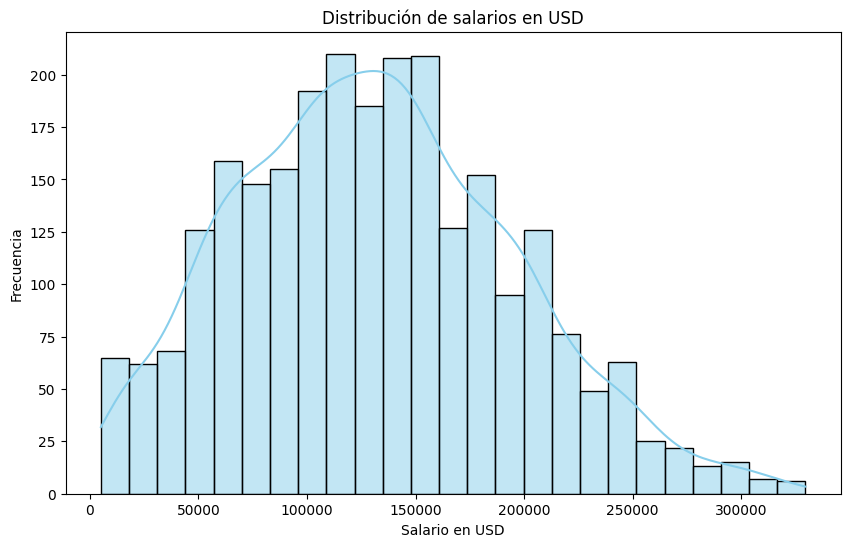

In [13]:
# 2. Exploración de datos

# Visualizaciones exploratorias univariadas

# Distribución de salarios en USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='skyblue')
plt.title('Distribución de salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()

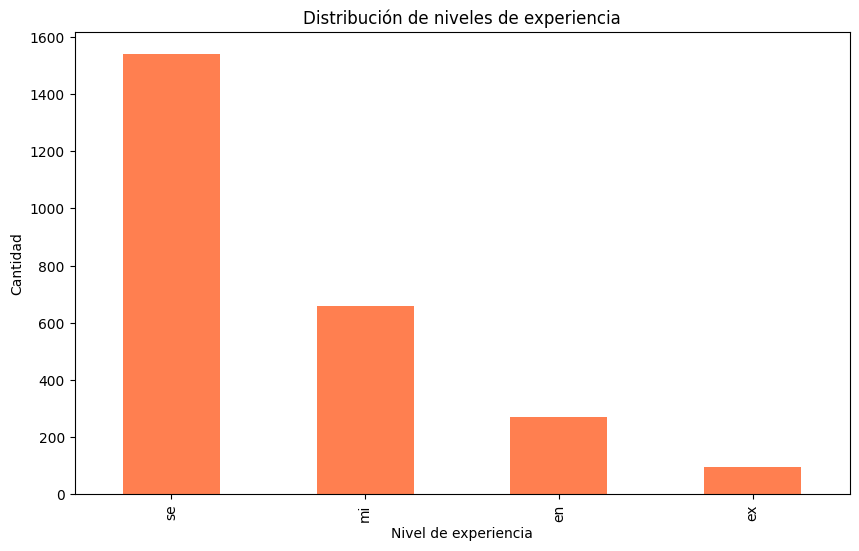

In [14]:
# Interpretación: La distribución de salarios muestra una asimetría positiva,
# lo que indica que hay más salarios bajos y medios que salarios muy altos.

# Distribución de niveles de experiencia
plt.figure(figsize=(10, 6))
df['experience_level'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribución de niveles de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Cantidad')
plt.show()

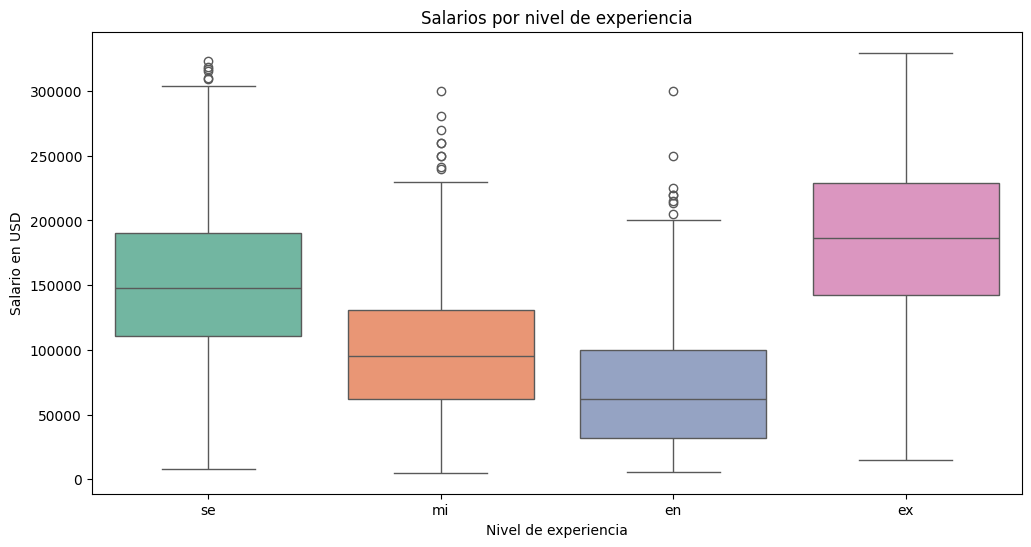

In [15]:
# Interpretación: La mayoría de los profesionales en el dataset tienen un nivel
# de experiencia senior (se), seguido por nivel medio (mi) y entrada (en).

# Visualizaciones exploratorias multivariadas

# Salarios por nivel de experiencia (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(
  x='experience_level',
  y='salary_in_usd',
  data=df,
  hue='experience_level',
  palette="Set2",
  dodge=False,
  legend=False
)
plt.title('Salarios por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.show()

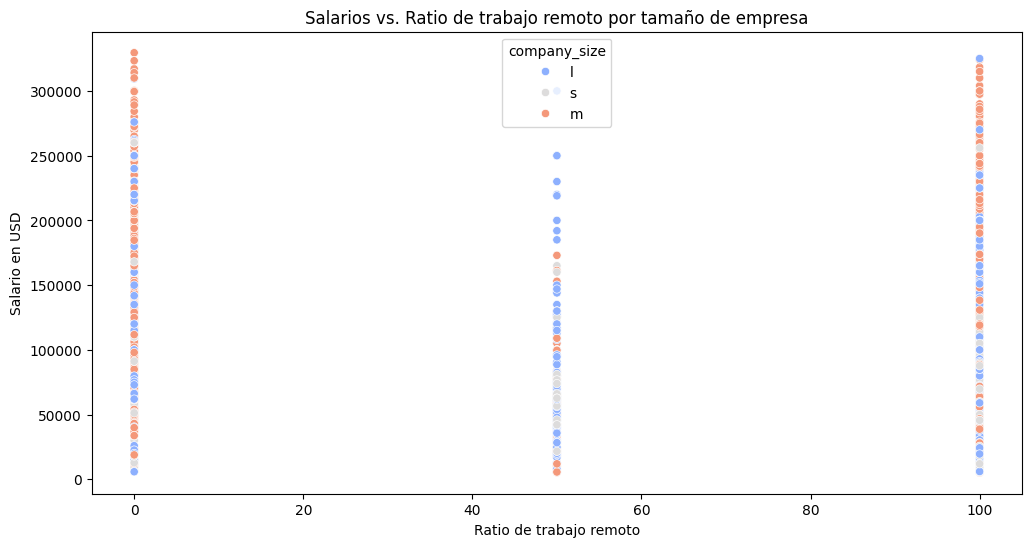

In [16]:
# Interpretación: Los salarios aumentan con el nivel de experiencia, y los niveles
# ejecutivos (ex) muestran la mayor variabilidad y los salarios más altos.

# Salarios vs. Ratio de trabajo remoto por tamaño de empresa (scatterplot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', hue='company_size', data=df, palette='coolwarm')
plt.title('Salarios vs. Ratio de trabajo remoto por tamaño de empresa')
plt.xlabel('Ratio de trabajo remoto')
plt.ylabel('Salario en USD')
plt.show()

In [17]:
# Interpretación: No parece haber una clara relación entre el ratio de trabajo remoto
# y el salario. Sin embargo, las empresas grandes tienden a ofrecer salarios más altos.

# 3. Análisis adicional

# Estadísticas descriptivas para la columna de salarios
print(df['salary_in_usd'].describe())

# Identificación de tendencias

# Top 10 trabajos mejor pagados
top_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
print("Top 10 trabajos mejor pagados:")
print(top_paying_jobs)

# Salario promedio por tamaño de empresa
salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nSalario promedio por tamaño de empresa:")
print(salary_by_company_size)

# Salario promedio por ratio de trabajo remoto
remote_work_impact = df.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)
print("\nSalario promedio por ratio de trabajo remoto:")
print(remote_work_impact)

count      2563.000000
mean     131374.868904
std       63450.984995
min        5132.000000
25%       84053.000000
50%      129300.000000
75%      175000.000000
max      329500.000000
Name: salary_in_usd, dtype: float64
Top 10 trabajos mejor pagados:
job_title
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Principal Data Engineer                192500.000000
Principal Machine Learning Engineer    190000.000000
Applied Scientist                      185020.666667
Head of Data                           183857.500000
Data Science Manager                   181930.173077
Director of Data Science               179334.800000
Data Infrastructure Engineer           175051.666667
Business Intelligence Engineer         174150.000000
Name: salary_in_usd, dtype: float64

Salario promedio por tamaño de empresa:
company_size
m    140090.108135
l    107702.199501
s     76051.705479
Name: salary_in_usd, dtype: float64

Salario promedio por rati

    # Tendencias notables:
    # 1. Los trabajos mejor pagados tienden a ser roles de liderazgo o altamente especializados.
    # 2. Las empresas grandes generalmente ofrecen salarios + altos.
    # 3. No hay una clara relación entre el trabajo remoto y los salarios, lo que sugiere
    #    que otros factores como la experiencia y el rol son + determinantes.
    # 4. Hay una gran variabilidad en los salarios, incluso dentro de los mismos niveles de experiencia.
